In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skopt.space import Integer
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import datetime
#import shap
import plotly.express as px
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
df = pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/G_treino_imagens.csv', engine='python',sep=';')

In [4]:
X = df.drop('Grade', axis =1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df['Grade']

Counter({0.0: 189, 1.0: 113, 2.0: 26, 3.0: 3})


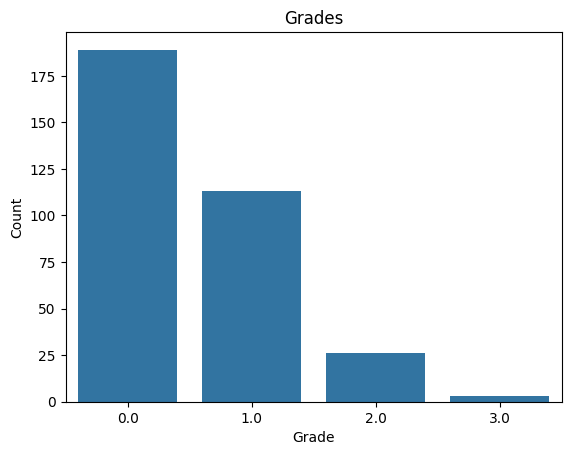

In [5]:
print(Counter(y))
ax = sns.countplot(x="Grade", data = df)
plt.title('Grades')
plt.ylabel('Count')
plt.show()

In [6]:
oversample = SMOTE(k_neighbors = 2)
X, y = oversample.fit_resample(X, y)

Counter({0.0: 189, 1.0: 189, 2.0: 189, 3.0: 189})


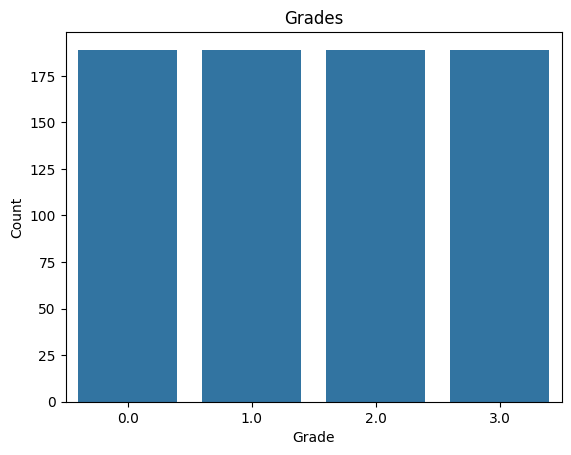

In [7]:
print(Counter(y))
ax = sns.countplot(x=y)
plt.ylabel('Count')
plt.title('Grades')
plt.show()

In [8]:
acc_val = [] #to store rmse values for different k
k = []
for K in range(20):
    K = K+1
    k.append(K)
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X, y)  #fit the model
    print(model.score(X,y))
    
    desempenho_cross_val = cross_val_score(model, X, y, scoring = 'accuracy', cv = 5)
    acc_val.append(round(100*desempenho_cross_val.mean(),2)) #store rmse values
    print('Accuracy value for k = ' , K , 'is:', round(100*desempenho_cross_val.mean(),2), '+/-' , round(100*desempenho_cross_val.std(),2))

1.0
Accuracy value for k =  1 is: 95.37 +/- 2.95
0.9947089947089947
Accuracy value for k =  2 is: 96.56 +/- 2.41
0.9761904761904762
Accuracy value for k =  3 is: 93.53 +/- 3.15
0.9735449735449735
Accuracy value for k =  4 is: 93.4 +/- 3.98
0.9616402116402116
Accuracy value for k =  5 is: 91.01 +/- 3.99
0.9629629629629629
Accuracy value for k =  6 is: 90.75 +/- 4.25
0.9391534391534392
Accuracy value for k =  7 is: 89.3 +/- 4.79
0.9457671957671958
Accuracy value for k =  8 is: 89.43 +/- 4.08
0.9272486772486772
Accuracy value for k =  9 is: 87.84 +/- 4.55
0.9285714285714286
Accuracy value for k =  10 is: 86.79 +/- 5.24
0.9047619047619048
Accuracy value for k =  11 is: 86.79 +/- 5.8
0.9047619047619048
Accuracy value for k =  12 is: 86.79 +/- 5.24
0.8955026455026455
Accuracy value for k =  13 is: 86.79 +/- 5.24
0.8915343915343915
Accuracy value for k =  14 is: 87.18 +/- 4.86
0.8849206349206349
Accuracy value for k =  15 is: 86.52 +/- 4.41
0.8822751322751323
Accuracy value for k =  16 is: 86

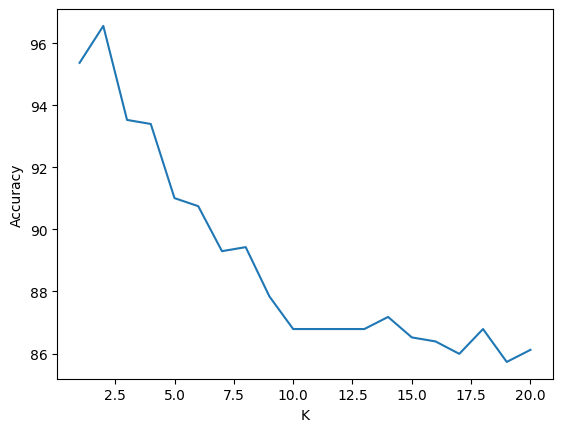

In [9]:
plt.plot(k, acc_val)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        21
         1.0       0.83      0.77      0.80        13
         2.0       0.25      0.33      0.29         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.82        38
   macro avg       0.50      0.51      0.50        38
weighted avg       0.81      0.82      0.81        38

Desempenho médio: 83.33 ± 20.41


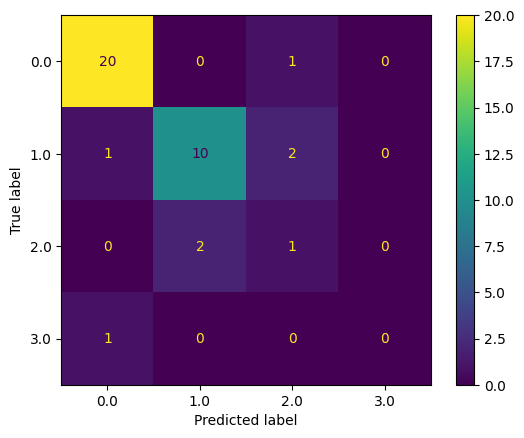

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
dft=pd.read_csv(r'C:\Users\marco\OneDrive - usp.br\Área de Trabalho\Mestrado\Resultados/G_teste_imagens.csv', engine='python',sep=';')
Xt = dft.drop('Grade', axis =1)
scaler = StandardScaler()
Xt = scaler.fit_transform(Xt)
yt = dft['Grade']
y_pred = knn.fit(X,y).predict(Xt)
print(classification_report(yt, y_pred))
ConfusionMatrixDisplay.from_predictions(yt,y_pred,values_format='.7g')
desempenho_cross_val = cross_val_score(knn, Xt, yt, scoring = 'accuracy', cv = 10)
print('Desempenho médio: {}'.format(round(100*desempenho_cross_val.mean(),2)) + ' ± '+ '{}'.format(round(100*desempenho_cross_val.std(),2)))


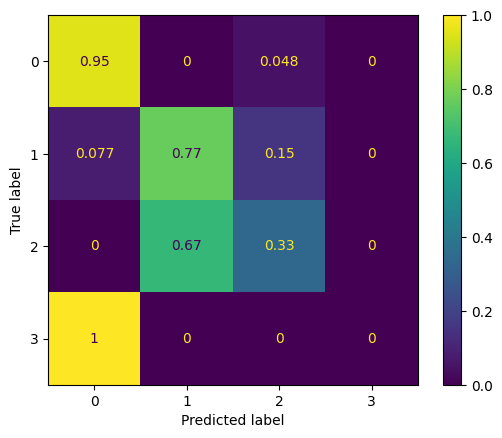

In [11]:
# Confusion matrix
cm = confusion_matrix(yt, y_pred)
    
    # Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Display the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1,2,3])
disp.plot()
plt.show()

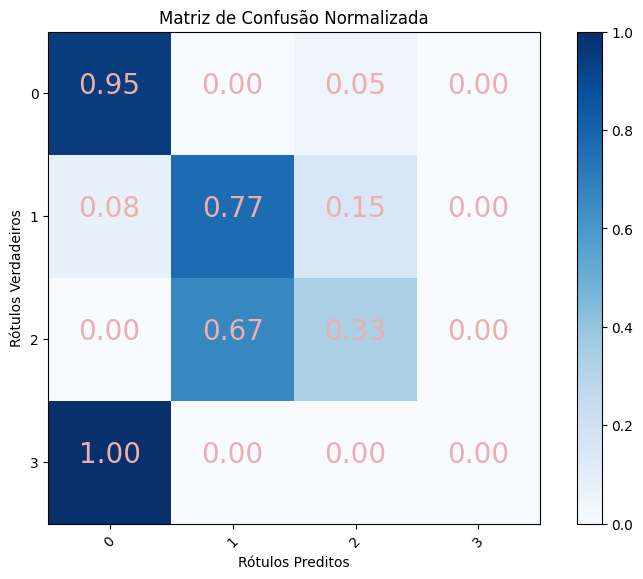

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(yt, y_pred, normalize='true')

# Criar um heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão Normalizada')
plt.colorbar()

# Adicionar rótulos aos eixos
class_labels = ['0','1','2','3']  # Substitua pelos seus rótulos
# Configure o tamanho da fonte
plt.rc('font', size=20)  # Defina o tamanho da fonte desejado
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Adicionar os valores nas células
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{cm[i, j]:.2f}", horizontalalignment="center", color="#ECAEAE")

plt.tight_layout()
plt.xlabel('Rótulos Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()